# Machin learning practice activity
## Model na bazie danych, dotyczącej ilości odbytych wizyt u lekarza osób 50+

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [6]:
age = pd.read_csv('NPHA-doctor-visits.csv', encoding= 'utf-8')

In [7]:
age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Number of Doctors Visited                   714 non-null    int64
 1   Age                                         714 non-null    int64
 2   Phyiscal Health                             714 non-null    int64
 3   Mental Health                               714 non-null    int64
 4   Dental Health                               714 non-null    int64
 5   Employment                                  714 non-null    int64
 6   Stress Keeps Patient from Sleeping          714 non-null    int64
 7   Medication Keeps Patient from Sleeping      714 non-null    int64
 8   Pain Keeps Patient from Sleeping            714 non-null    int64
 9   Bathroom Needs Keeps Patient from Sleeping  714 non-null    int64
 10  Uknown Keeps Patient from Sleeping    

In [49]:
print("Statystyki opisowe:")
display(age.describe())

Statystyki opisowe:


,Number of Doctors Visited,Phyiscal Health,Mental Health,Dental Health,Employment,Stress Keeps Patient from Sleeping,Medication Keeps Patient from Sleeping,Pain Keeps Patient from Sleeping,Bathroom Needs Keeps Patient from Sleeping,Uknown Keeps Patient from Sleeping,Trouble Sleeping,Prescription Sleep Medication,Race,Gender
count,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000
mean,2.110799,2.793829,1.988780,3.009818,2.806452,0.248247,0.056101,0.218794,0.504909,0.416550,2.406732,2.828892,1.422160,1.551192
std,0.683110,0.901538,0.940588,1.362072,0.586949,0.432299,0.230278,0.413719,0.500327,0.493333,0.670451,0.547113,0.999951,0.497722
min,1.000000,-1.000000,-1.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,1.000000,1.000000
25%,2.000000,2.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,1.000000,1.000000
50%,2.000000,3.000000,2.000000,3.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,3.000000,1.000000,2.000000
75%,3.000000,3.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,3.000000,1.000000,2.000000
max,3.000000,5.000000,5.000000,6.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,5.000000,2.000000


In [47]:
age

,Number of Doctors Visited,Phyiscal Health,Mental Health,Dental Health,Employment,Stress Keeps Patient from Sleeping,Medication Keeps Patient from Sleeping,Pain Keeps Patient from Sleeping,Bathroom Needs Keeps Patient from Sleeping,Uknown Keeps Patient from Sleeping,Trouble Sleeping,Prescription Sleep Medication,Race,Gender
0,3,4,3,3,3,0,0,0,0,1,2,3,1,2
1,2,4,2,3,3,1,0,0,1,0,3,3,1,1
3,1,3,2,3,3,0,0,0,1,0,3,3,4,2
4,3,3,3,3,3,1,0,0,0,0,2,3,1,2
5,2,3,2,4,3,0,0,0,1,0,3,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,2,2,2,2,3,0,0,0,1,0,3,3,1,1
710,3,2,2,2,2,1,0,0,0,1,2,3,1,2
711,3,4,2,3,3,0,0,0,0,0,3,3,1,1
712,3,3,1,3,3,1,0,1,1,1,3,3,1,2


In [45]:

print('Rozkład liczby wizyt w ciągu roku:')
print(age['Number of Doctors Visited'].value_counts())

Rozkład liczby wizyt w ciągu roku:
Number of Doctors Visited
2    372
3    210
1    131
Name: count, dtype: int64


In [46]:
age.columns

Index(['Number of Doctors Visited', 'Phyiscal Health', 'Mental Health',
       'Dental Health', 'Employment', 'Stress Keeps Patient from Sleeping',
       'Medication Keeps Patient from Sleeping',
       'Pain Keeps Patient from Sleeping',
       'Bathroom Needs Keeps Patient from Sleeping',
       'Uknown Keeps Patient from Sleeping', 'Trouble Sleeping',
       'Prescription Sleep Medication', 'Race', 'Gender'],
      dtype='object')

In [23]:
num_cols= ['Number of Doctors Visited', 'Phyiscal Health', 'Mental Health',\
        'Dental Health', 'Employment', 'Stress Keeps Patient from Sleeping',\
       'Medication Keeps Patient from Sleeping',\
       'Pain Keeps Patient from Sleeping',\
       'Bathroom Needs Keeps Patient from Sleeping',\
       'Uknown Keeps Patient from Sleeping', 'Trouble Sleeping',\
       'Prescription Sleep Medication', 'Race', 'Gender']

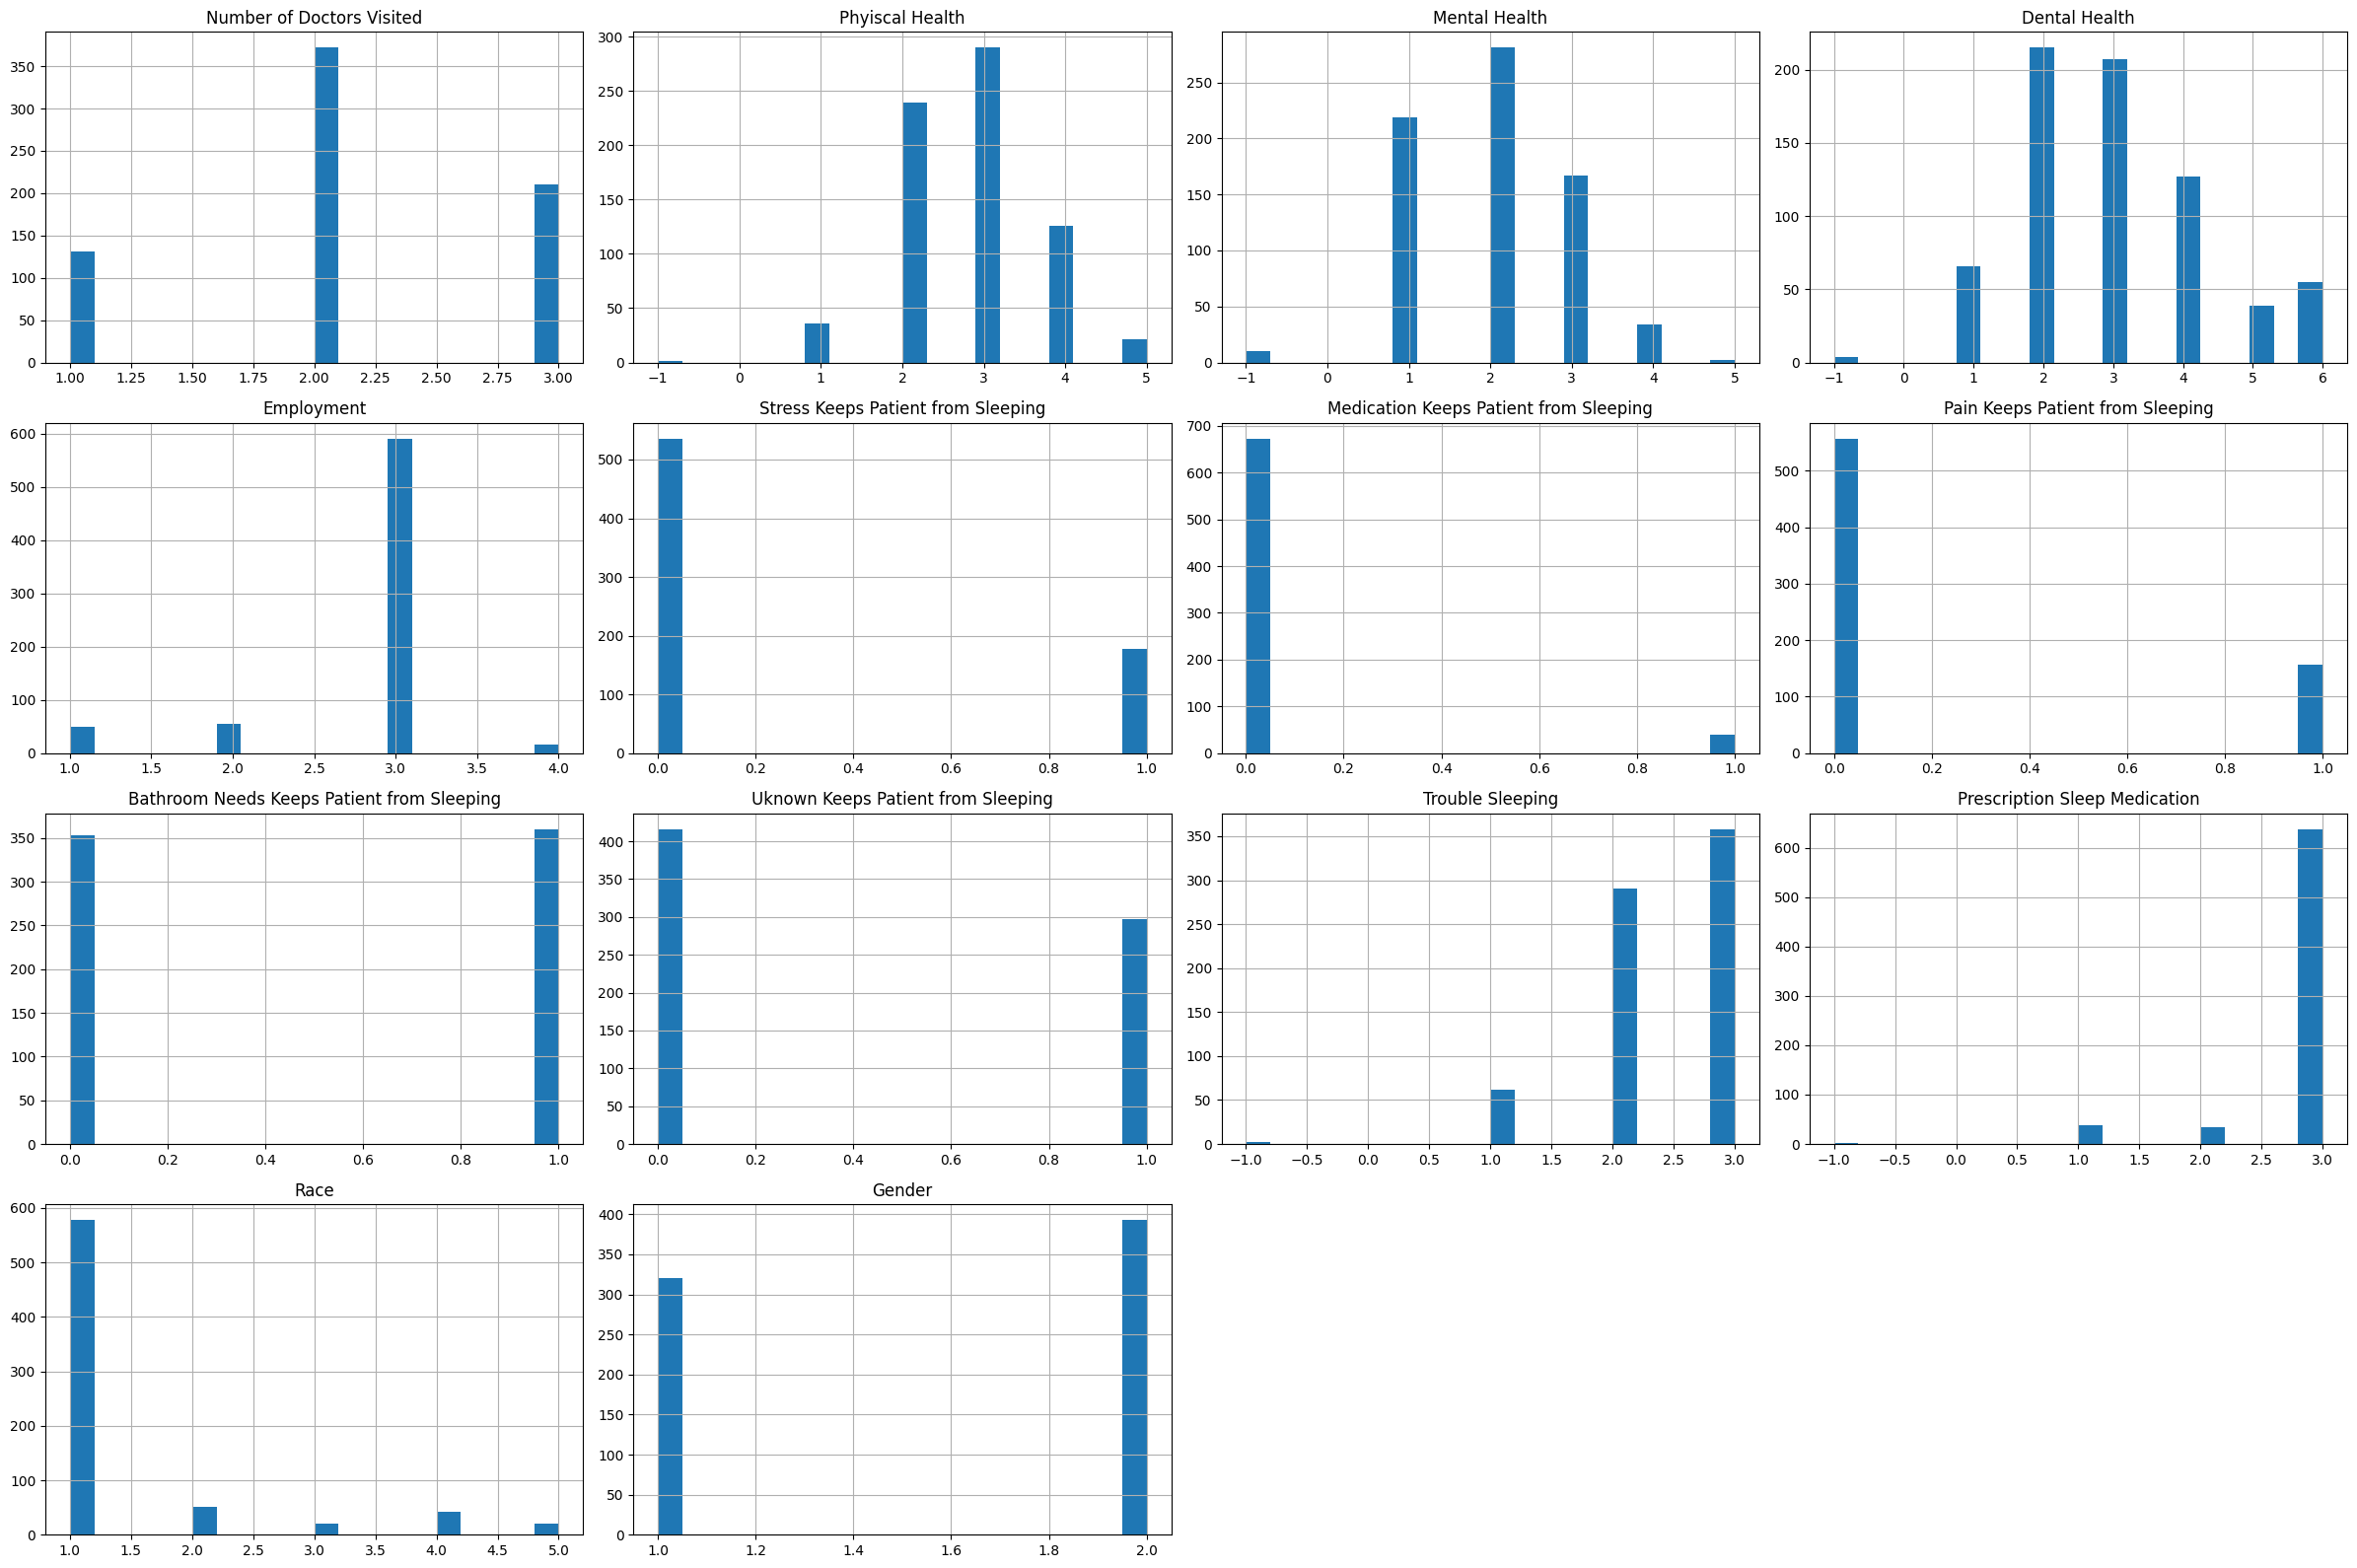

In [24]:
age[num_cols].hist(figsize=(24,16), bins=20 )
plt.tight_layout()
plt.show();


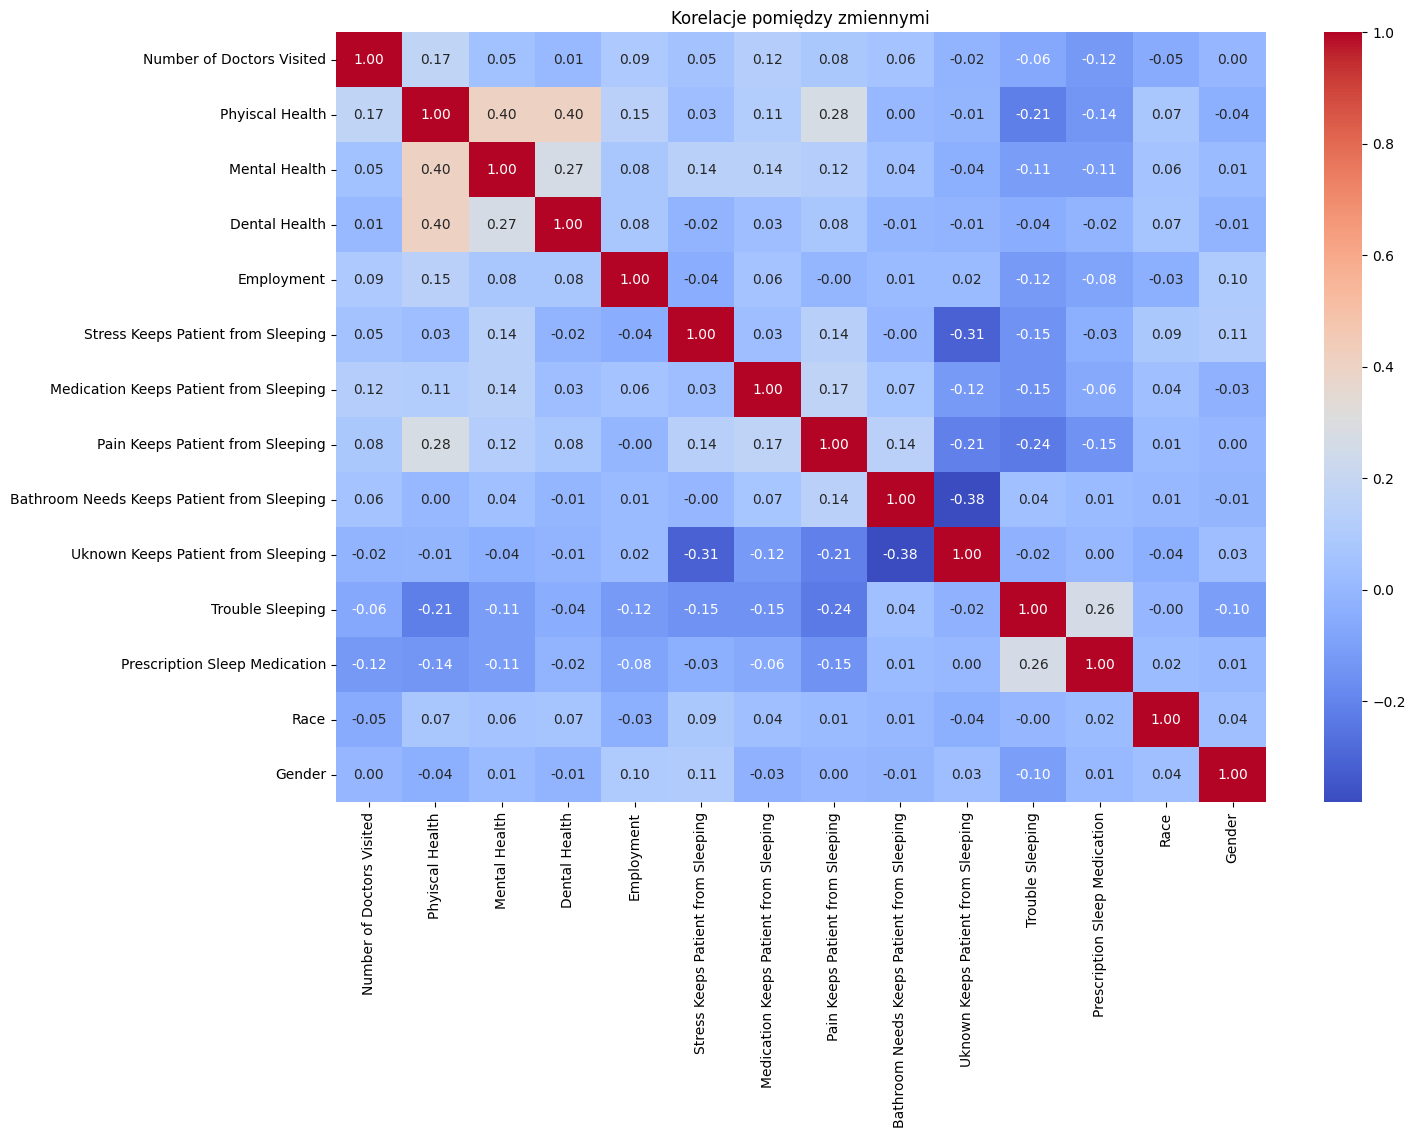

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(age.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelacje pomiędzy zmiennymi')
plt.show();

C:\Users\pauli\AppData\Local\Temp\ipykernel_14192\3853627598.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=age, x=col, hue='Number of Doctors Visited', shade=True, palette='bright')


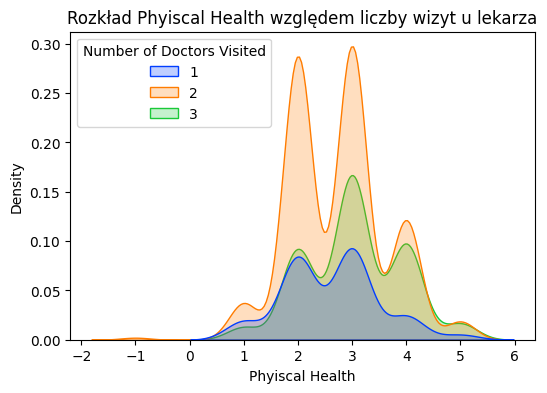

C:\Users\pauli\AppData\Local\Temp\ipykernel_14192\3853627598.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=age, x=col, hue='Number of Doctors Visited', shade=True, palette='bright')


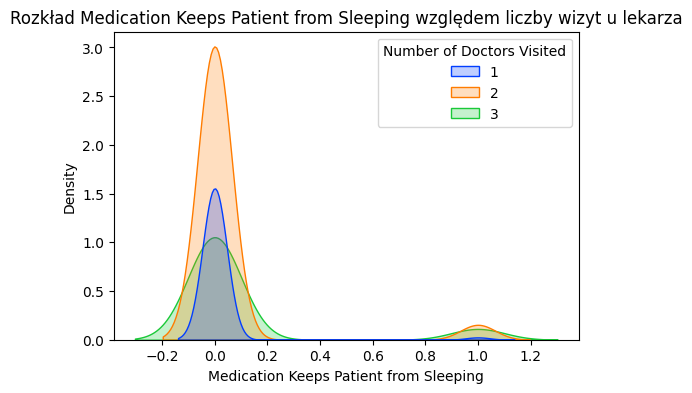

C:\Users\pauli\AppData\Local\Temp\ipykernel_14192\3853627598.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=age, x=col, hue='Number of Doctors Visited', shade=True, palette='bright')


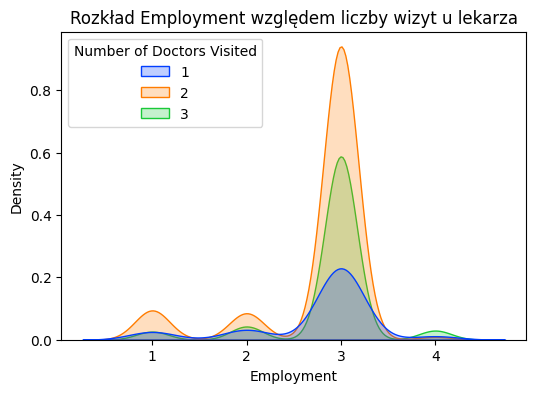

C:\Users\pauli\AppData\Local\Temp\ipykernel_14192\3853627598.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=age, x=col, hue='Number of Doctors Visited', shade=True, palette='bright')


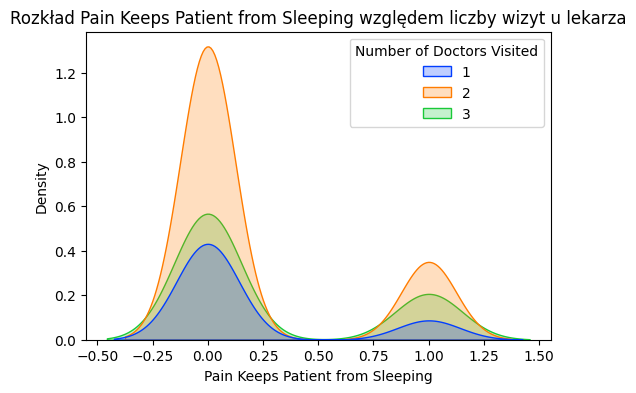

In [11]:

for col in ['Phyiscal Health','Medication Keeps Patient from Sleeping','Employment', 'Pain Keeps Patient from Sleeping']:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=age, x=col, hue='Number of Doctors Visited', shade=True, palette='bright')
    plt.title(f'Rozkład {col} względem liczby wizyt u lekarza')
    plt.show();

In [8]:
X = age.drop('Number of Doctors Visited', axis=1)
y=age['Number of Doctors Visited']


In [9]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [51]:
tree= DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=50)

In [49]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=50, random_state=42)

In [50]:
train_tree= tree.score(X_train, y_train)
test_tree= tree.score(X_test, y_test)
print(f'Accuracy test score {test_tree}')
print(f'Accuracy train score {train_tree}')

Accuracy test score 0.46153846153846156
Accuracy train score 0.9422066549912435


In [47]:
depths=[1,2,3,10,50,100]

best_model=None
best_score=0
for depth in depths:
    tree= DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth= depth)
    tree.fit(X_train, y_train)
    train_tree= tree.score(X_train, y_train)
    test_tree= tree.score(X_test, y_test)
    if test_tree>best_score:
        best_score= test_tree
        best_model= tree
    print(f'Results for depth={depth}')
    print("Accuracy na treningu:", train_tree)
    print("Accuracy na teście:", test_tree)
    print('--'*20)   

Results for depth=1
Accuracy na treningu: 0.5201401050788091
Accuracy na teście: 0.5244755244755245
----------------------------------------
Results for depth=2
Accuracy na treningu: 0.5201401050788091
Accuracy na teście: 0.5244755244755245
----------------------------------------
Results for depth=3
Accuracy na treningu: 0.5394045534150613
Accuracy na teście: 0.5454545454545454
----------------------------------------
Results for depth=10
Accuracy na treningu: 0.7320490367775832
Accuracy na teście: 0.4405594405594406
----------------------------------------
Results for depth=50
Accuracy na treningu: 0.9422066549912435
Accuracy na teście: 0.46153846153846156
----------------------------------------
Results for depth=100
Accuracy na treningu: 0.9422066549912435
Accuracy na teście: 0.46153846153846156
----------------------------------------


In [52]:
imputer= SimpleImputer(strategy= 'mean')
scaler= StandardScaler()

In [53]:
tree_pipeline= Pipeline([
    ('scaler', scaler),
    ('tree', DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=50) )
])

In [65]:
lr_pipeline= Pipeline([
    ('imputer', imputer),
    ('scaler', scaler),
    ('lr', LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'))
])

In [33]:
knn_pipeline= Pipeline([
    ('imputer', imputer),
    ('scaler', scaler),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

In [54]:
StandardScaler().fit_transform(X_train).shape

(571, 14)

In [55]:
X_train

,Age,Phyiscal Health,Mental Health,Dental Health,Employment,Stress Keeps Patient from Sleeping,Medication Keeps Patient from Sleeping,Pain Keeps Patient from Sleeping,Bathroom Needs Keeps Patient from Sleeping,Uknown Keeps Patient from Sleeping,Trouble Sleeping,Prescription Sleep Medication,Race,Gender
575,2,5,5,3,3,1,1,1,1,0,1,1,1,1
194,2,5,3,4,3,0,0,0,1,0,3,3,1,1
425,2,3,1,3,3,0,0,0,0,1,3,3,1,2
315,2,5,1,1,4,0,0,0,0,1,1,1,1,1
412,2,2,2,4,2,0,0,0,0,0,3,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,2,2,1,4,3,0,0,0,1,0,3,3,1,2
176,2,2,2,3,3,0,1,0,0,0,3,3,1,1
469,2,2,1,3,3,0,0,0,0,1,2,3,4,2
617,2,1,1,2,1,0,0,0,1,0,3,3,1,1


In [66]:
lr_pipeline.named_steps['lr']

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [67]:
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('lr',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

In [56]:
tree_pipeline.named_steps['tree']

DecisionTreeClassifier(criterion='entropy', max_depth=50, random_state=42)

In [59]:
tree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('tree',
                 DecisionTreeClassifier(criterion='entropy', max_depth=50,
                                        random_state=42))])

In [57]:
X_test

,Age,Phyiscal Health,Mental Health,Dental Health,Employment,Stress Keeps Patient from Sleeping,Medication Keeps Patient from Sleeping,Pain Keeps Patient from Sleeping,Bathroom Needs Keeps Patient from Sleeping,Uknown Keeps Patient from Sleeping,Trouble Sleeping,Prescription Sleep Medication,Race,Gender
528,2,1,1,1,3,0,0,0,1,0,2,3,4,2
202,2,3,2,4,3,1,0,0,0,0,3,3,1,1
397,2,2,2,2,3,0,0,0,1,0,2,3,2,1
20,2,3,2,3,3,1,0,1,1,0,2,3,1,1
455,2,2,1,2,3,0,0,0,0,1,3,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,2,2,1,3,1,0,0,0,0,1,3,3,1,1
111,2,1,1,1,3,0,0,0,1,0,3,3,1,2
29,2,3,1,6,3,0,0,0,0,1,2,3,1,2
573,2,4,5,6,3,0,0,0,0,1,3,2,1,2


In [68]:
y_pred= lr_pipeline.predict(X_test)
y_pred

array([1, 3, 1, 3, 1, 3, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 3, 2, 2, 3, 1, 3,
       1, 1, 3, 1, 1, 2, 2, 3, 2, 1, 3, 3, 3, 1, 2, 3, 2, 1, 1, 2, 3, 1,
       2, 3, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 2, 3, 1, 1, 3, 1, 2, 1, 3,
       1, 1, 2, 2, 3, 1, 1, 3, 2, 3, 3, 1, 3, 1, 3, 1, 1, 1, 3, 1, 2, 1,
       2, 1, 3, 3, 3, 3, 3, 1, 2, 1, 2, 3, 3, 1, 2, 2, 3, 3, 2, 2, 3, 1,
       2, 3, 1, 1, 3, 2, 2, 3, 1, 2, 1, 3, 2, 1, 1, 3, 1, 3, 1, 1, 3, 2,
       1, 1, 1, 2, 3, 1, 1, 1, 1, 3, 3])

In [62]:
y_pred_tree= tree_pipeline.predict(X_test)
y_pred

array([1, 2, 2, 2, 1, 3, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, 2, 3, 2, 2, 2, 3,
       2, 3, 2, 2, 1, 2, 2, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 2, 3, 1, 2, 2,
       1, 2, 2, 2, 2, 3, 3, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 1, 2, 2, 3, 2, 2, 1, 3, 1, 1, 2, 2,
       1, 2, 3, 3, 2, 3, 2, 2, 3, 2, 2, 2, 2, 1, 2, 2, 3, 2, 2, 3, 3, 1,
       2, 2, 3, 2, 3, 2, 1, 1, 2, 2, 3, 2, 2, 1, 1, 3, 2, 3, 1, 3, 2, 2,
       3, 1, 1, 2, 2, 2, 2, 2, 3, 2, 2])

In [63]:
print('Decision tree score')
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))

Decision tree score
Accuracy: 0.46153846153846156
Confusion Matrix:
 [[ 6 15  5]
 [11 46 18]
 [ 4 24 14]]
Classification Report:
               precision    recall  f1-score   support

           1       0.29      0.23      0.26        26
           2       0.54      0.61      0.57        75
           3       0.38      0.33      0.35        42

    accuracy                           0.46       143
   macro avg       0.40      0.39      0.39       143
weighted avg       0.45      0.46      0.45       143



In [69]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.40559440559440557
Confusion Matrix:
 [[14  6  6]
 [33 21 21]
 [14  5 23]]
Classification Report:
               precision    recall  f1-score   support

           1       0.23      0.54      0.32        26
           2       0.66      0.28      0.39        75
           3       0.46      0.55      0.50        42

    accuracy                           0.41       143
   macro avg       0.45      0.46      0.40       143
weighted avg       0.52      0.41      0.41       143



In [41]:
knn_pipeline.fit(X_train, y_train)
y_pred_knn = knn_pipeline.predict(X_test)

In [43]:
print("\nWyniki dla KNN:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


Wyniki dla KNN:
Accuracy: 0.45454545454545453
Confusion Matrix:
 [[ 4 19  3]
 [12 54  9]
 [ 6 29  7]]
Classification Report:
               precision    recall  f1-score   support

           1       0.18      0.15      0.17        26
           2       0.53      0.72      0.61        75
           3       0.37      0.17      0.23        42

    accuracy                           0.45       143
   macro avg       0.36      0.35      0.34       143
weighted avg       0.42      0.45      0.42       143

